# Introduction
In this notebook, we compute the odds ratios for each transcription factor (TF) node in a series of preprocessed genotype embedding matrices. This analysis enables us to identify the relative association of each node with different roles.

## Calculate odds ratio

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import os

def convert_to_binary(df, informative_cols):
    """Convert non-zero values in TF columns to 1, keeping 0 as is."""
    node_columns = [col for col in df.columns if col not in informative_cols]
    df_binary = df.copy()
    df_binary[node_columns] = (df_binary[node_columns] > 0).astype(int)
    return df_binary, node_columns

def calculate_odds_ratio(df, node, dividend_role):
    """Calculate the odds ratio for a given node, controlling the dividend role based on file naming."""
    # Create a contingency table and reorder rows based on the specified dividend role
    contingency_table = pd.crosstab(df['Role'], df[node])
    contingency_table = contingency_table.reindex([dividend_role, contingency_table.index.difference([dividend_role])[0]])
    
    # Calculate odds ratio if the table is 2x2
    if contingency_table.shape == (2, 2):
        odds_ratio, _ = stats.fisher_exact(contingency_table)
        return odds_ratio
    return np.nan

def compute_all_odds_ratios(df, node_columns, dividend_role):
    """Compute odds ratios for each node column."""
    odds_ratios = {node: calculate_odds_ratio(df, node, dividend_role) for node in node_columns}
    return pd.DataFrame(list(odds_ratios.items()), columns=['Node', 'Odds Ratio'])

def clean_odds_ratios(odds_ratios_df):
    """Filter out NaN and infinite values from the odds ratios DataFrame."""
    odds_ratios_df['Odds Ratio'] = odds_ratios_df['Odds Ratio'].replace([np.inf, -np.inf], np.nan)
    odds_ratios_df.dropna(inplace=True)
    odds_ratios_df.reset_index(drop=True, inplace=True)
    return odds_ratios_df

# Main process
input_dir = "../../Data/matched_embedding_subset"
output_dir = "../../Data/paired_odds_ratio"
file_list = [f for f in os.listdir(input_dir) if f[:4] != 'full']
for file in file_list:
    dividend_role = file.split('_')[2]
    df = pd.read_csv(f"{input_dir}/{file}")
    informative_cols = ['SFARI ID', 'Repository Id', 'Role', 'ASD']
    df_binary, node_columns = convert_to_binary(df, informative_cols)
    odds_ratios_df = compute_all_odds_ratios(df_binary, node_columns, dividend_role)
    cleaned_odds_ratios_df = clean_odds_ratios(odds_ratios_df)
    
    # Display the final cleaned odds ratios DataFrame
    cleaned_odds_ratios_df.to_csv(f"{output_dir}/{file.replace('embedding_matrix','odds_ratio')}")

In [12]:
df

,Unnamed: 0,SFARI ID,Repository Id,Role,ENSG00000223764.2,ENSG00000187634.12,ENSG00000188976.11,ENSG00000187961.14,ENSG00000215790.7,ENSG00000157933.10,...,ENSG00000182492.16,ENSG00000130822.15,ENSG00000101986.12,ENSG00000184216.14,ENSG00000169057.23,ENSG00000007350.17,ENSG00000196924.18,ENSG00000013563.14,ENSG00000160211.19,ASD
0,5,11001.mo,SSC02181,mo,1,1,1,1,1,1,...,1,1,1,1,2,1,1,1,1,0
1,6,11001.p1,SS0013024,p1,1,1,1,1,1,1,...,1,1,1,1,2,1,1,1,1,1
2,20,11006.mo,SSC00005,mo,1,1,0,1,1,1,...,1,1,1,1,2,1,1,1,1,0
3,21,11006.p1,SSC00003,p1,1,1,0,1,1,1,...,1,1,1,1,2,1,1,1,1,1
4,32,11010.mo,SSC02854,mo,1,1,1,1,1,1,...,1,1,1,1,2,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,9348,14690.mo,SSC09671,mo,1,1,1,1,1,1,...,1,1,1,1,2,1,1,1,1,0
1539,9349,14690.p1,SSC09667,p1,1,1,1,1,1,1,...,1,1,1,1,2,1,1,1,1,1
1540,9359,14693.mo,SSC12644,mo,1,1,1,1,1,2,...,1,1,1,1,2,1,1,1,1,0
1541,9359,14693.mo,SSC12644,mo,1,1,1,1,1,1,...,1,1,1,1,2,1,1,1,1,0


In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import os

def convert_to_binary(df, informative_cols):
    """Convert non-zero values in TF columns to 1, keeping 0 as is."""
    node_columns = [col for col in df.columns if col not in informative_cols]
    df_binary = df.copy()
    df_binary[node_columns] = (df_binary[node_columns] > 0).astype(int)
    return df_binary, node_columns

def calculate_odds_ratio(df, node, dividend_role):
    """Calculate the odds ratio for a given node and return the contingency table as a string."""
    # Create a contingency table and reorder rows based on the specified dividend role
    contingency_table = pd.crosstab(df['Role'], df[node])
    contingency_table = contingency_table.reindex([dividend_role, contingency_table.index.difference([dividend_role])[0]])

    # Calculate odds ratio if the table is 2x2 and capture the table values
    if contingency_table.shape == (2, 2):
        odds_ratio, _ = stats.fisher_exact(contingency_table)
        # Extract the four values from the contingency table
        values = contingency_table.values.flatten()
        contingency_str = f"{values[0]}_{values[1]}_{values[2]}_{values[3]}"
        return odds_ratio, contingency_str
    return np.nan, "NaN"

def compute_all_odds_ratios(df, node_columns, dividend_role):
    """Compute odds ratios for each node column and store the contingency table values."""
    results = [
        (node, *calculate_odds_ratio(df, node, dividend_role)) 
        for node in node_columns
    ]
    return pd.DataFrame(results, columns=['Node', 'Odds Ratio', 'Contingency Table'])

def clean_odds_ratios(odds_ratios_df):
    """Filter out NaN and infinite values from the odds ratios DataFrame."""
    odds_ratios_df['Odds Ratio'] = odds_ratios_df['Odds Ratio'].replace([np.inf, -np.inf], np.nan)
    odds_ratios_df.dropna(inplace=True)
    odds_ratios_df.reset_index(drop=True, inplace=True)
    return odds_ratios_df

# Main process
input_dir = "../../Data/matched_embedding_subset"
output_dir = "../../Data/paired_odds_ratio"
file_list = [f for f in os.listdir(input_dir) if f[:4] != 'full']
for file in file_list:
    dividend_role = file.split('_')[2]
    df = pd.read_csv(f"{input_dir}/{file}")
    informative_cols = ['SFARI ID', 'Repository Id', 'Role', 'ASD']
    df_binary, node_columns = convert_to_binary(df, informative_cols)
    odds_ratios_df = compute_all_odds_ratios(df_binary, node_columns, dividend_role)
    cleaned_odds_ratios_df = clean_odds_ratios(odds_ratios_df)
    
    # Save the final cleaned odds ratios DataFrame with contingency table info
    cleaned_odds_ratios_df.to_csv(f"{output_dir}/{file.replace('embedding_matrix','odds_ratio')}")


# Plot odds ratio 

In [11]:
filtered_df

,Unnamed: 0,Node,Odds Ratio,Contingency Table
0,0,ENSG00000188976.11,0.981968,67_694_70_712
3,3,ENSG00000197921.6,0.869468,533_228_570_212
8,8,ENSG00000189337.17,0.944360,275_486_293_489
10,10,ENSG00000219481.10,1.068089,101_660_98_684
25,25,ENSG00000185668.8,1.055544,610_151_620_162
...,...,...,...,...
952,952,ENSG00000126767.18,0.388776,191_570_362_420
955,955,ENSG00000273820.2,0.895039,58_703_66_716
959,959,ENSG00000196767.9,0.361073,116_645_260_522
963,963,ENSG00000177485.7,0.195174,28_733_128_654


Pair: fa_p1. Count: 235


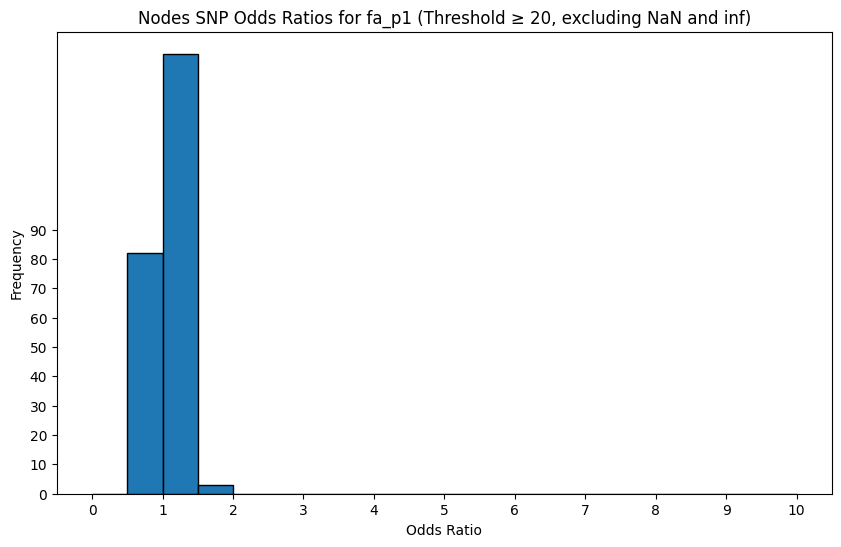

Pair: s1_p1. Count: 174


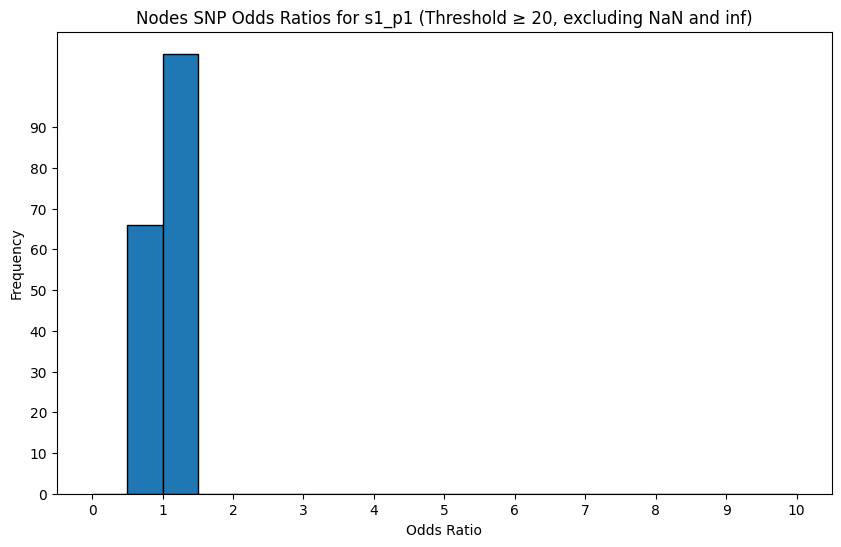

Pair: fa_s1. Count: 174


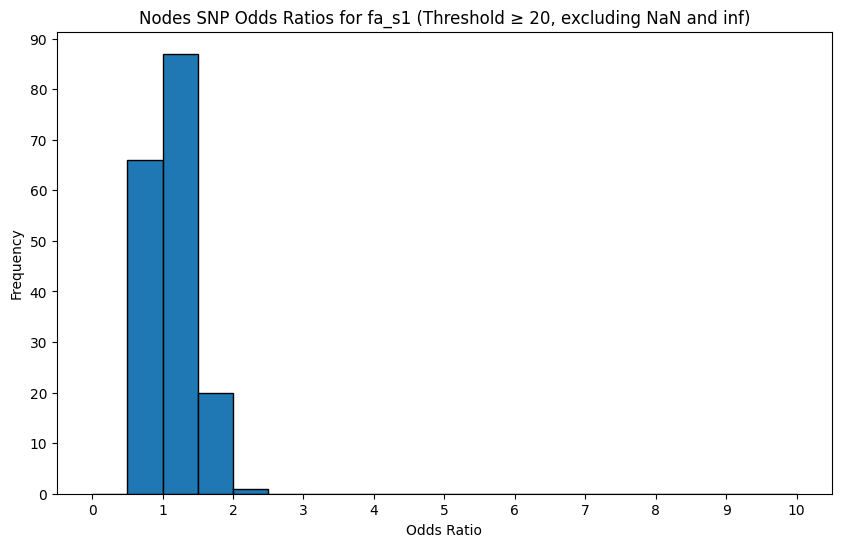

Pair: fa_mo. Count: 235


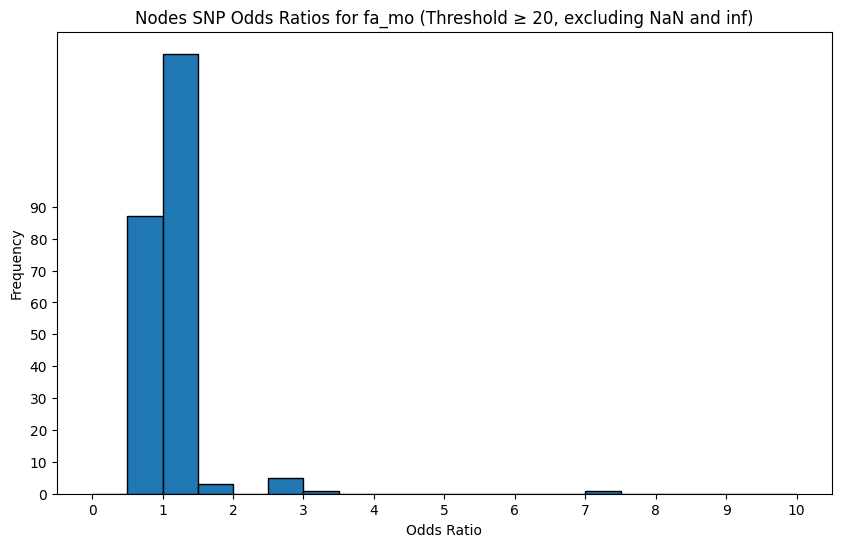

Pair: mo_p1. Count: 234


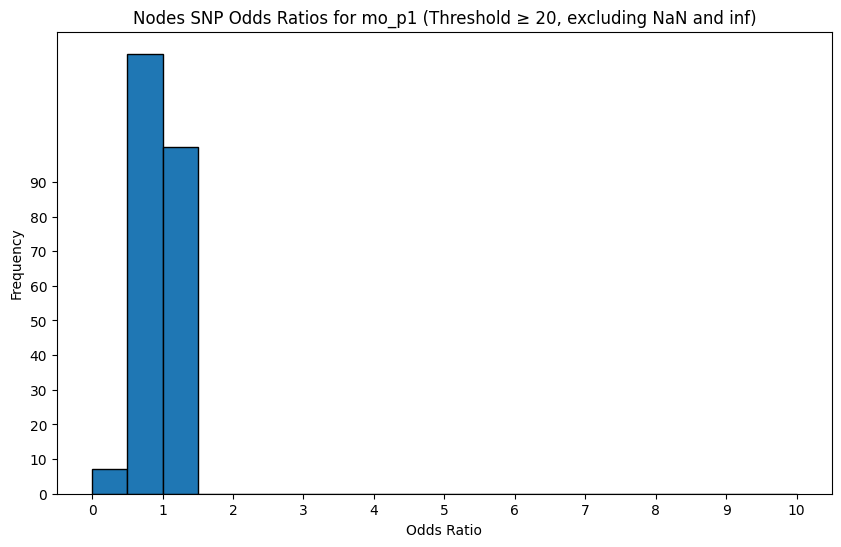

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Define threshold for the smallest value in the contingency table
ep = 20  # Adjust this threshold as needed

# Set fixed bin size and range for all histograms
bin_size = 0.5  # Define the desired bin size
bins = np.arange(0, 10 + bin_size, bin_size)  # Adjust the range as necessary for your data

# Iterate through each odds ratio file and plot odds ratios that meet the threshold
for file in file_list:
    # Load the cleaned odds ratio DataFrame with contingency information
    odds_ratios_df = pd.read_csv(f"{output_dir}/{file.replace('embedding_matrix','odds_ratio')}")
    title = file.replace('embedding_matrix_','').replace('_2024_10_30.csv','')
    
    # Filter rows based on the smallest value in the contingency table being at least `ep`
    def meets_threshold(contingency_str):
        values = list(map(int, contingency_str.split('_')))
        return min(values) >= ep

    filtered_df = odds_ratios_df[odds_ratios_df['Contingency Table'].apply(meets_threshold)]
    filtered_odds_ratios = filtered_df['Odds Ratio'].replace([np.inf, -np.inf, 0], np.nan).dropna()
    
    print(f"Pair: {title}. Count: {len(filtered_odds_ratios)}")
    
    # Plot the histogram if there are any valid odds ratios
    if not filtered_odds_ratios.empty:
        plt.figure(figsize=(10, 6))
        plt.hist(filtered_odds_ratios, bins=bins, edgecolor='black')  # Use fixed bins
        plt.xlabel('Odds Ratio')
        plt.ylabel('Frequency')
        plt.title(f"Nodes SNP Odds Ratios for {title} (Threshold ≥ {ep}, excluding NaN and inf)")
        plt.xticks(np.arange(0, 10 + bin_size, 1))  # Adjust tick range as necessary
        plt.yticks(np.arange(0, 100, 10))  # Adjust tick range as necessary
        plt.savefig(f"../../Image/Odds_Ratios_for_{title}_Threshold_{ep}.png")
        plt.show()
